# Zones-based Network

In [1]:
import os
import sys
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from allocate_to_zone import *
import json
import pandas as pd

In [3]:
file_path = '../data/zone/zones_json.geojson'
json_file = json.loads(open(file_path).read())['features']

In [4]:
zones_list = load_zone(json_file)[:20]

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cartopy.crs as ccrs
import cartopy.feature

In [6]:
colors = ['salmon', 'lightgreen', 'violet','navajowhite', 'skyblue',]

C:\Users\Yifan\AppData\Local\Temp\ipykernel_23848\198193082.py:17: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(z)):
C:\Users\Yifan\AppData\Local\Temp\ipykernel_23848\198193082.py:18: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  plot_polygon(ax, z[i], facecolor=c, edgecolor='black')


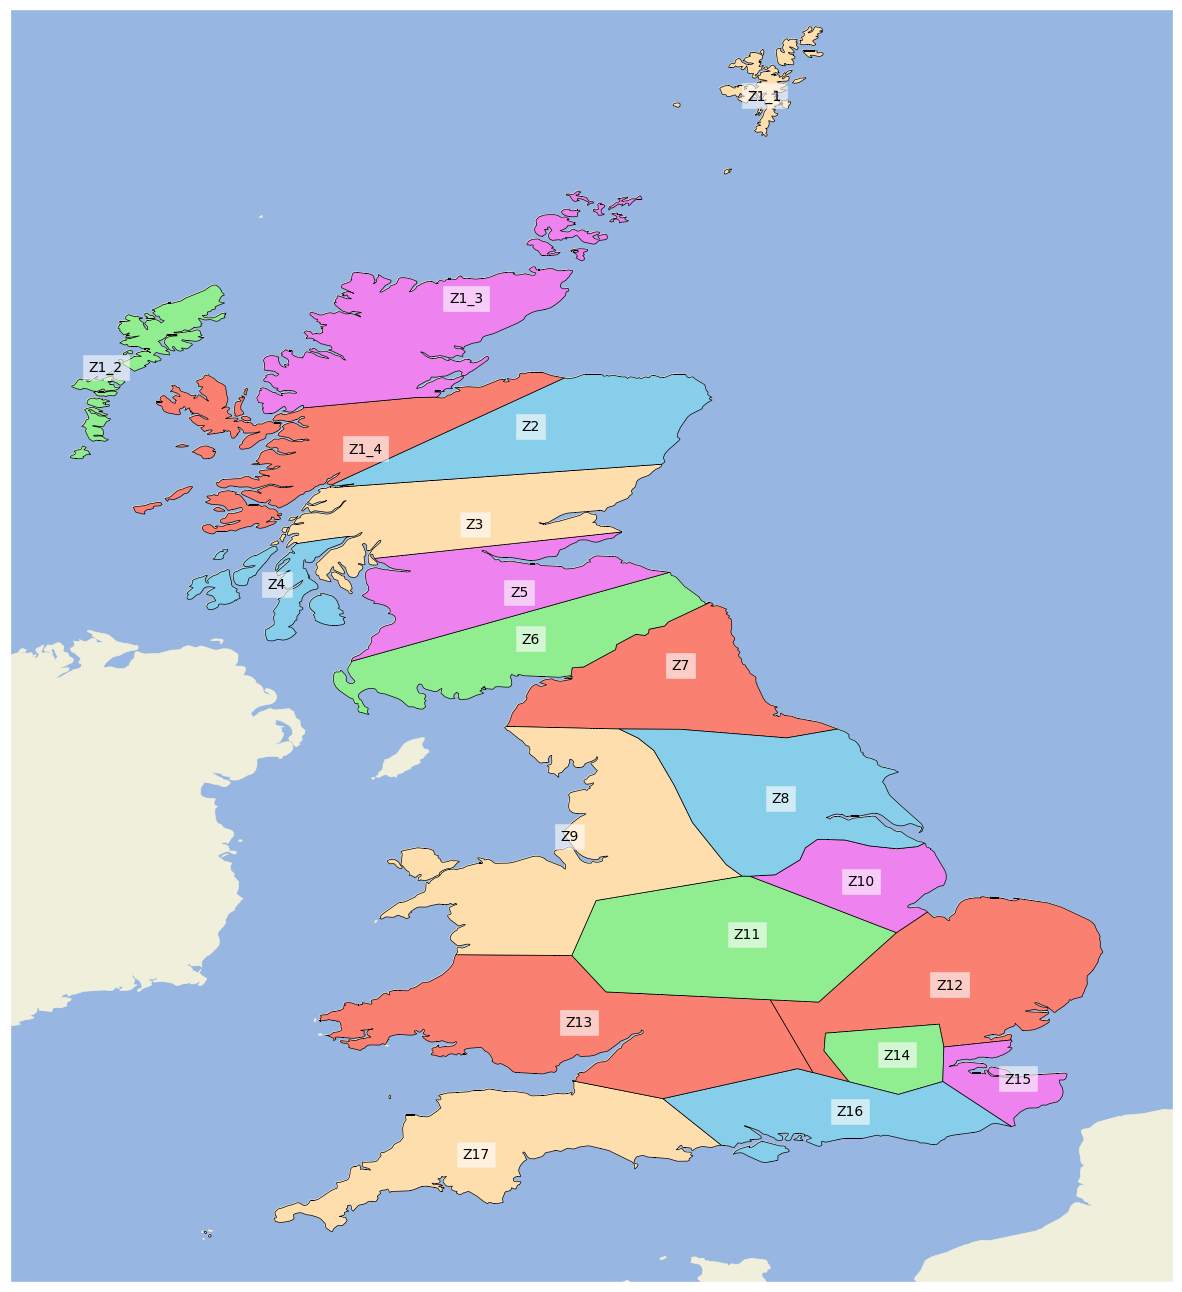

In [7]:
fig = plt.figure()
fig.set_size_inches(15, 17)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

extent = [-8.09782, 2.40511, 61, 49.5]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)

for _ in range(len(zones_list)):
    z = zones_list[_]
    c = colors[_%len(colors)]
    try:
        plot_polygon(ax, z, facecolor=c, edgecolor='black')
    except:
        for i in range(len(z)):
            plot_polygon(ax, z[i], facecolor=c, edgecolor='black')
    z_name = json_file[_]['properties']['Name_1']
    plt.text((z.bounds[0]+z.bounds[2])/2, (z.bounds[1]+z.bounds[3])/2, z_name, bbox = dict(facecolor = "white", alpha = 0.6))
            
# ax.set_title('Reduced Network GB', fontsize=20)

plt.show()